# Sampling methods: Box-Mueller to generate samples from Gaussian distributions

#### 07/22, written by Alice Cicirello (alicecicirello8@gmail.com) - based on online resources 



## Quick Recap: Standard Gaussian Distribution

The probability density function (pdf) of a Gaussian Distribution is
$$
 p(x) = N(z,\mu,\sigma)=N(\mu,\sigma)=\frac{1}{\sigma\sqrt{2\pi}} 
  \exp\left( -\frac{1}{2}\left(\frac{z-\mu}{\sigma}\right)^{\!2}\,\right)
$$
A standard Gaussian distribution has zero mean and unit standard deviation

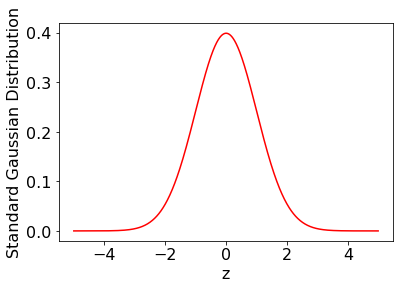

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

mean = 0; 
std = 1; 
variance = np.square(std)

z = np.arange(-5,5,.01)
f = np.exp(-np.square(z-mean)/(2*variance))/(np.sqrt(2*np.pi*variance))

plt.plot(z,f, color='red')
plt.ylabel('Standard Gaussian Distribution')
plt.xlabel('z')
plt.show()

## Generating samples from two standard Gaussian Distribution


Problem: generating 1000 independent samples for two standard Gaussian random variables using the Box-Mueller approach

Steps:
1. Generate samples from two independent uniform distributions
2. Compute the values of r and theta
3. Generate samples from two independent standard Gaussian distributions

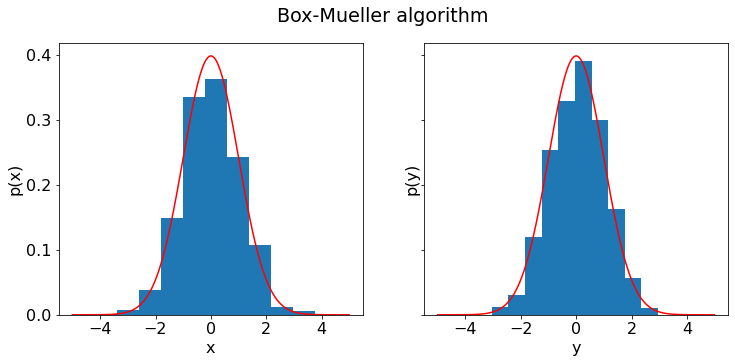

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

size = 1000  # adjust size if needed
U1 = np.random.uniform(size=size) # generate 1000 samples from uniform distribution
U2 = np.random.uniform(size=size) # generate 1000 samples from another uniform distribution

r = np.sqrt(-2 * np.log(U1))      # position vector in polar coordinate - inverse CDF of the exponential distribution   
Theta = 2 * np.pi * U2            # scale from 0 to 1, to 0 to 360 (2*\pi)

x = r * np.cos(Theta)             # Sample of the random variable X - N(0,1)  
y = r * np.sin(Theta)             # Sample of the random variable Y - N(0,1)  


fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 5))
plt.suptitle('Box-Mueller algorithm')
temp = ax1.hist(x,density=True)
temp = ax1.plot(z,f, color='red')
ax1.set_xlabel('x')
ax1.set_ylabel('p(x)')
temp = ax2.hist(y, density=True)
temp = ax2.plot(z,f, color='red')
plt.xlabel('y')
plt.ylabel('p(y)')
plt.show()